In [1]:
import numpy as np
import pandas as pd

from globalbonds.dataio.data_lib import DataLib
from plotnine import *

dlib = DataLib('../SignalData')
dlib.list()


GDP-Real
EquityPrices
LongRates
CurrAcctNom-inUSD
CoreCPI-SA
fxTrdWts-Real
M3-inUSD
CurrAcctPctGDP
fxTrdWts-Nominal
BondRetIdx-LocalFX
fxVsUSD
M2-inUSD
M1-inUSD
ShortRates
GDP-Nominal


In [66]:
def plot_tbl(tbl, ylabel, inject=lambda x: x):
    tbl = tbl.copy()
    tbl['date'] = tbl.index.to_series().map(lambda x: x.to_timestamp())
    tbl = tbl.melt(id_vars='date')
    tbl = inject(tbl)
    return (
        ggplot(tbl, aes(x='date', y='value', color='country')) +
            geom_line() +
            geom_point() +
            scale_color_brewer(type='qualitative', palette=3) +
            ylab(ylabel) +
            xlab('Date') +
            scale_x_date() +
            #theme_minimal() +
            theme(
                text=element_text(size=20),
                figure_size=(12, 8),
                legend_position='right',
                axis_text_x=element_text(size=20, angle=90, hjust=0),
                panel_border=element_rect(colour="black", size=2),
            )
    )


# Question 1

Bond yields across countries

/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1868 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 17301 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


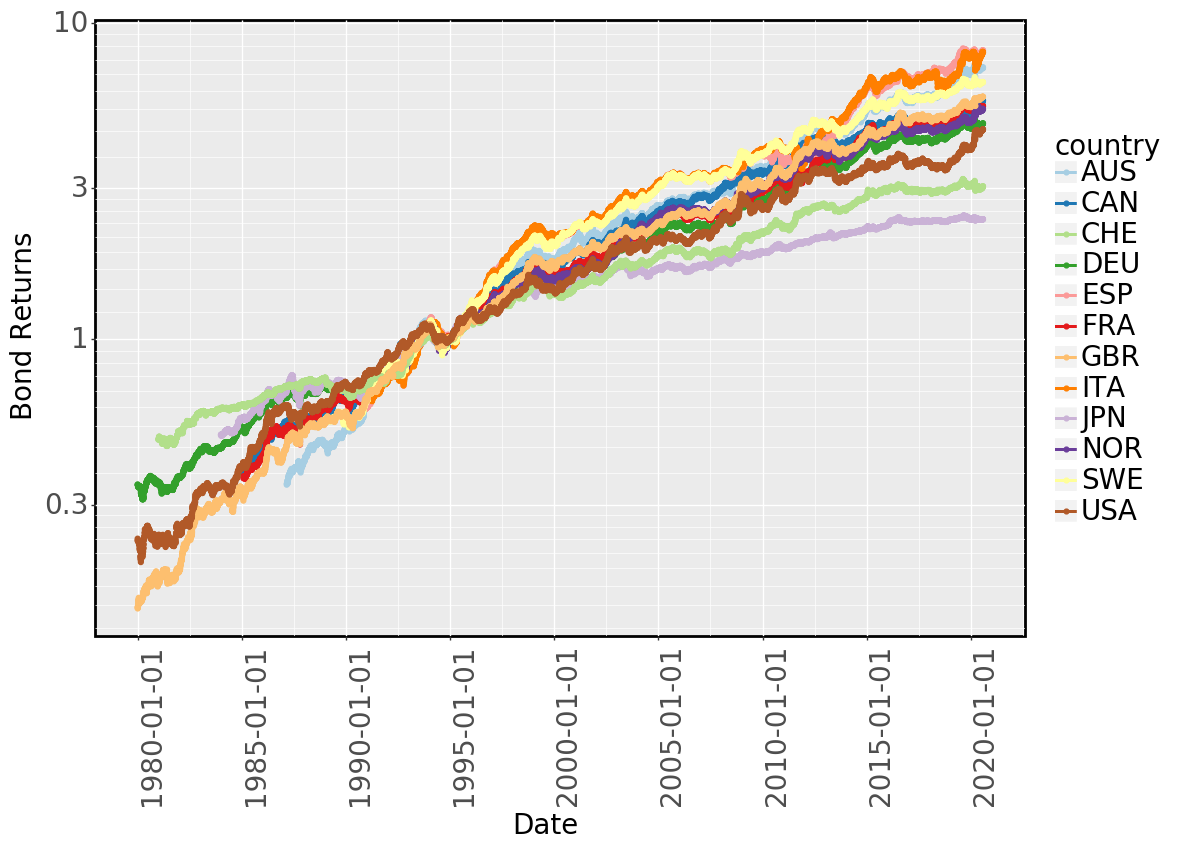

<ggplot: (8776770765516)>

In [72]:
bond_returns = dlib.pull('BondRetIdx-LocalFX')
bond_returns /= bond_returns.loc['1995-01-01']

plot_tbl(bond_returns, 'Bond Returns') + scale_y_log10()

In [85]:
bond_returns.columns

Index(['AUS', 'DEU', 'CAN', 'ESP', 'FRA', 'ITA', 'JPN', 'NOR', 'SWE', 'CHE',
       'GBR', 'USA'],
      dtype='object', name='country')

# Question 2

/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1903 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 17721 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


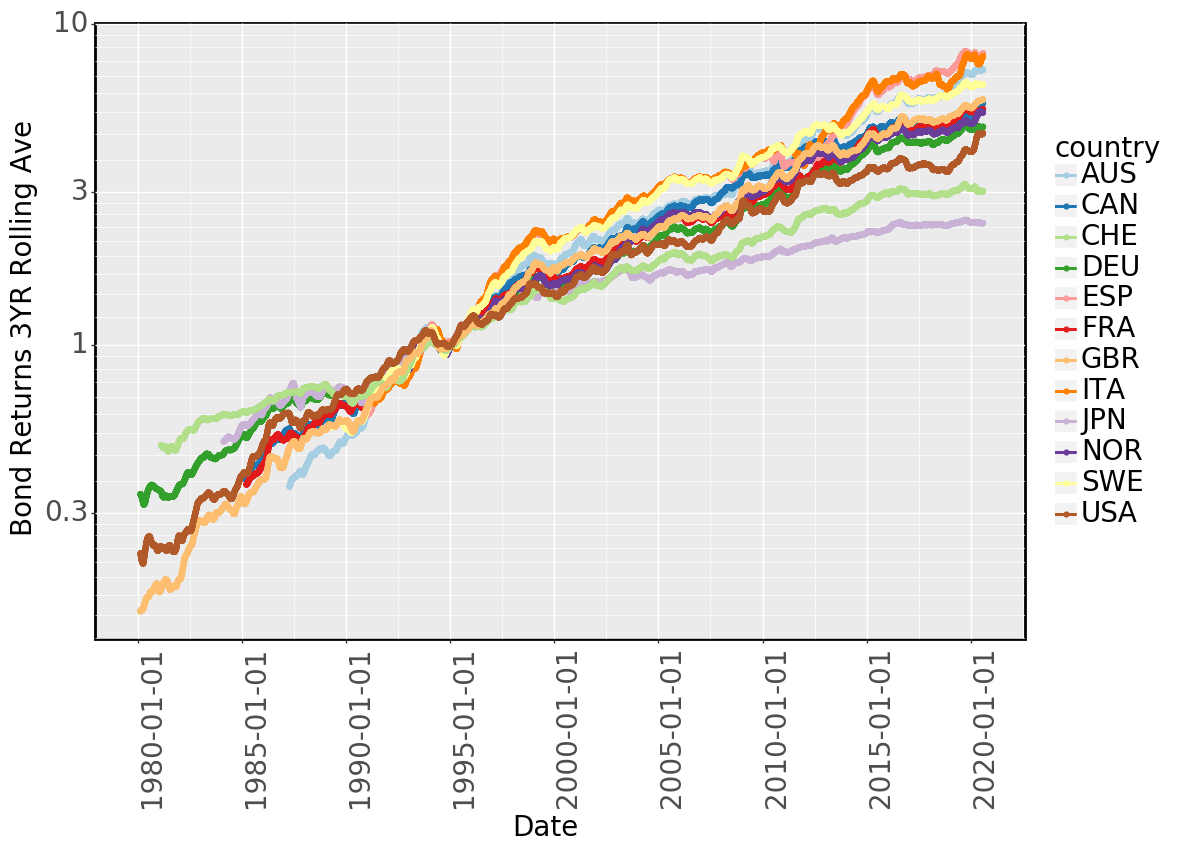

<ggplot: (-9223363260083464090)>

In [73]:
bond_returns = dlib.pull('BondRetIdx-LocalFX')
bond_returns /= bond_returns.loc['1995-01-01']
bond_returns_rolling = bond_returns.apply(lambda s: s.rolling(36).mean())

plot_tbl(bond_returns_rolling, 'Bond Returns 3YR Rolling Ave') + scale_y_log10()

# Question 3

/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 85 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 852 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


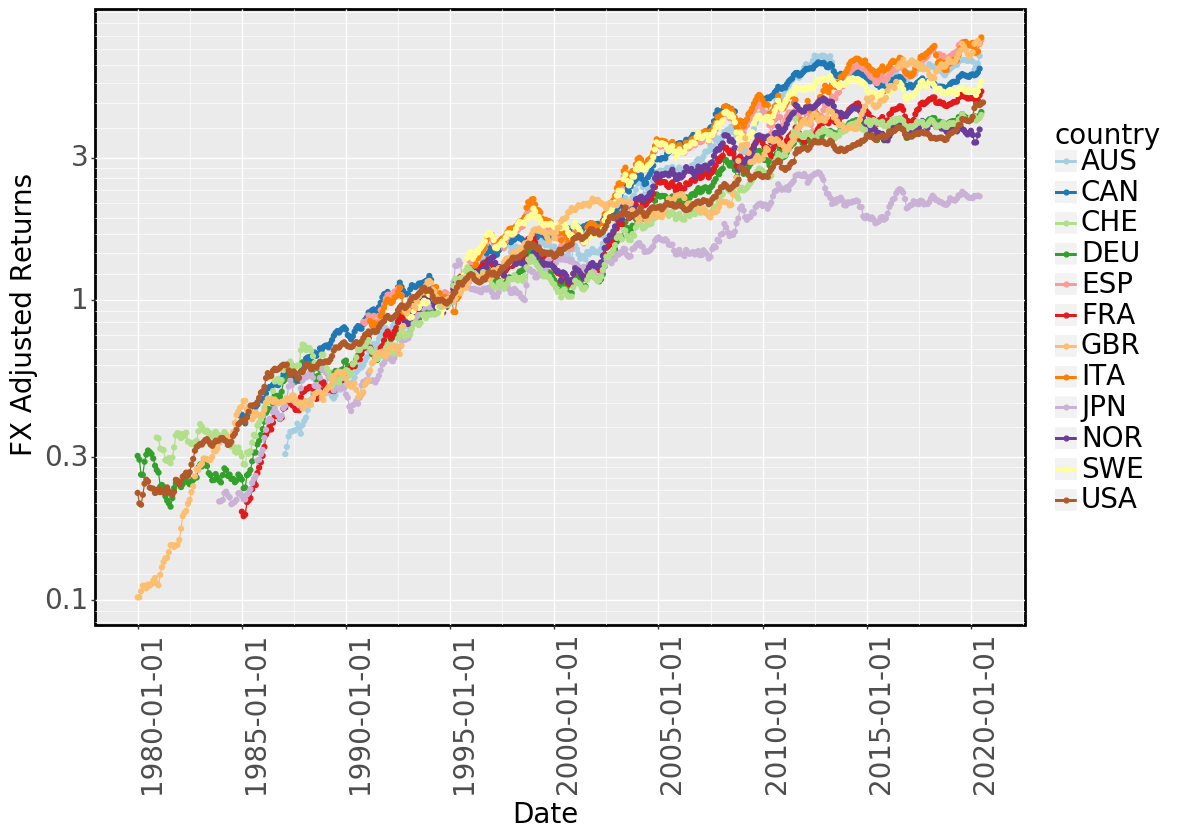

<ggplot: (8776771053895)>

In [71]:
bond_returns = dlib.pull('BondRetIdx-LocalFX')
bond_returns = bond_returns.resample('M').mean()
usd_fx = dlib.pull('fxVsUSD')
usd_fx['USA'] = 1  # USXRUSD ticker actually gives the EUR to USD exchange rate, super weird

fx_adjusted_returns = bond_returns / usd_fx
fx_adjusted_returns /= fx_adjusted_returns.loc['1995-01-01']  # arbitrary fixed point

plot_tbl(fx_adjusted_returns, 'FX Adjusted Returns') + scale_y_log10()

/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 85 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 852 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


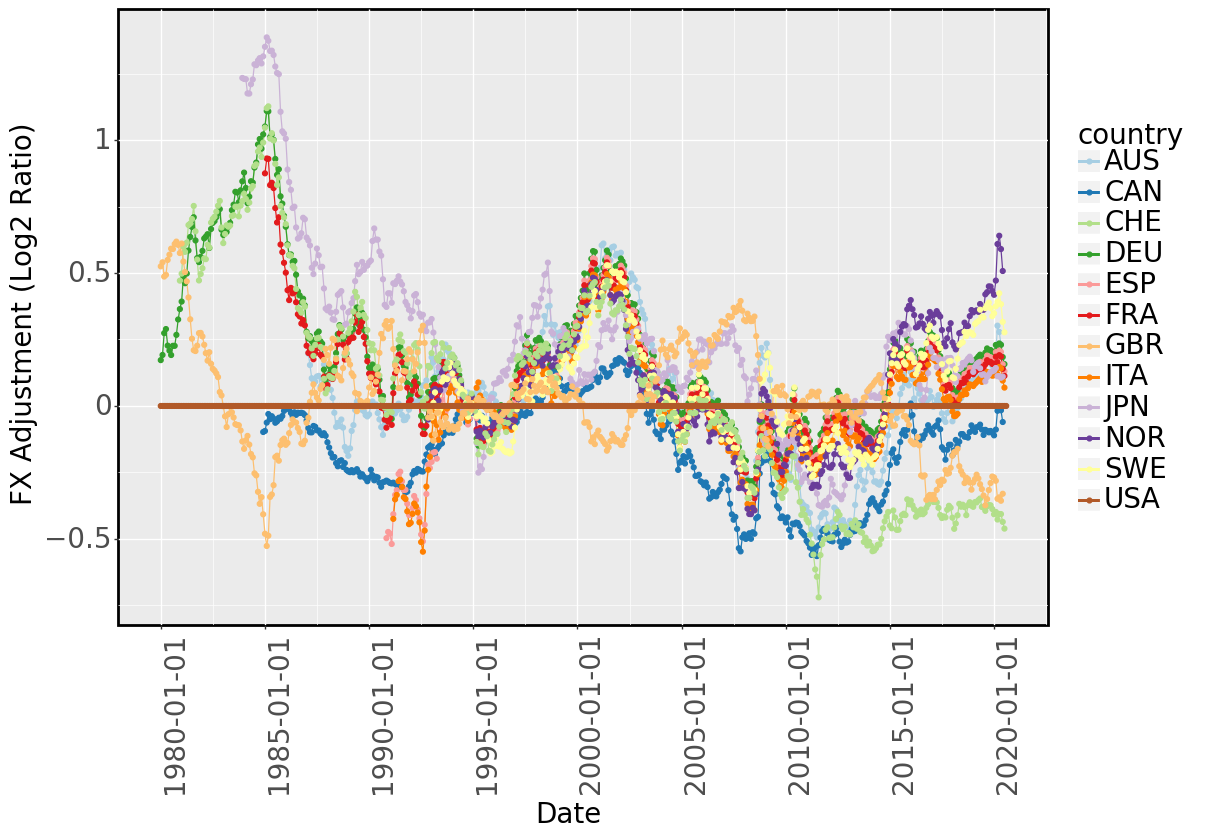

<ggplot: (-9223363260059698467)>

In [79]:
bond_returns = dlib.pull('BondRetIdx-LocalFX')
bond_returns = bond_returns.resample('M').mean()
bond_returns = bond_returns.applymap(lambda x: x * (1 - 2 / 10000))
bond_returns /= bond_returns.loc['1995-01-01']

fx_adjusted_diff = bond_returns.resample('M').mean() / fx_adjusted_returns
fx_adjusted_diff = fx_adjusted_diff.applymap(np.log2)
plot_tbl(fx_adjusted_diff, 'FX Adjustment (Log2 Ratio)')

In [124]:
fx_adjusted_diff

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,NOR,SWE,CHE,GBR,USA
date,,,,,,,,,,,,
1980-01,NaN,0.172333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.524944,-1.601713e-16
1980-02,NaN,0.191784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.540145,-1.601713e-16
1980-03,NaN,0.273948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.486552,-1.601713e-16
1980-04,NaN,0.289232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493011,0.000000e+00
1980-05,NaN,0.226939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549064,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04,0.278322,0.235135,-0.007268,0.208212,0.190929,0.146798,0.112230,0.640071,0.423702,-0.406020,-0.343574,0.000000e+00
2020-05,0.231268,0.229837,-0.016327,0.202916,0.185616,0.141501,0.106033,0.590020,0.382814,-0.406466,-0.356419,0.000000e+00
2020-06,0.148204,0.183919,-0.060367,0.156975,0.139696,0.095561,0.110575,0.507423,0.316122,-0.435895,-0.330151,0.000000e+00


/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


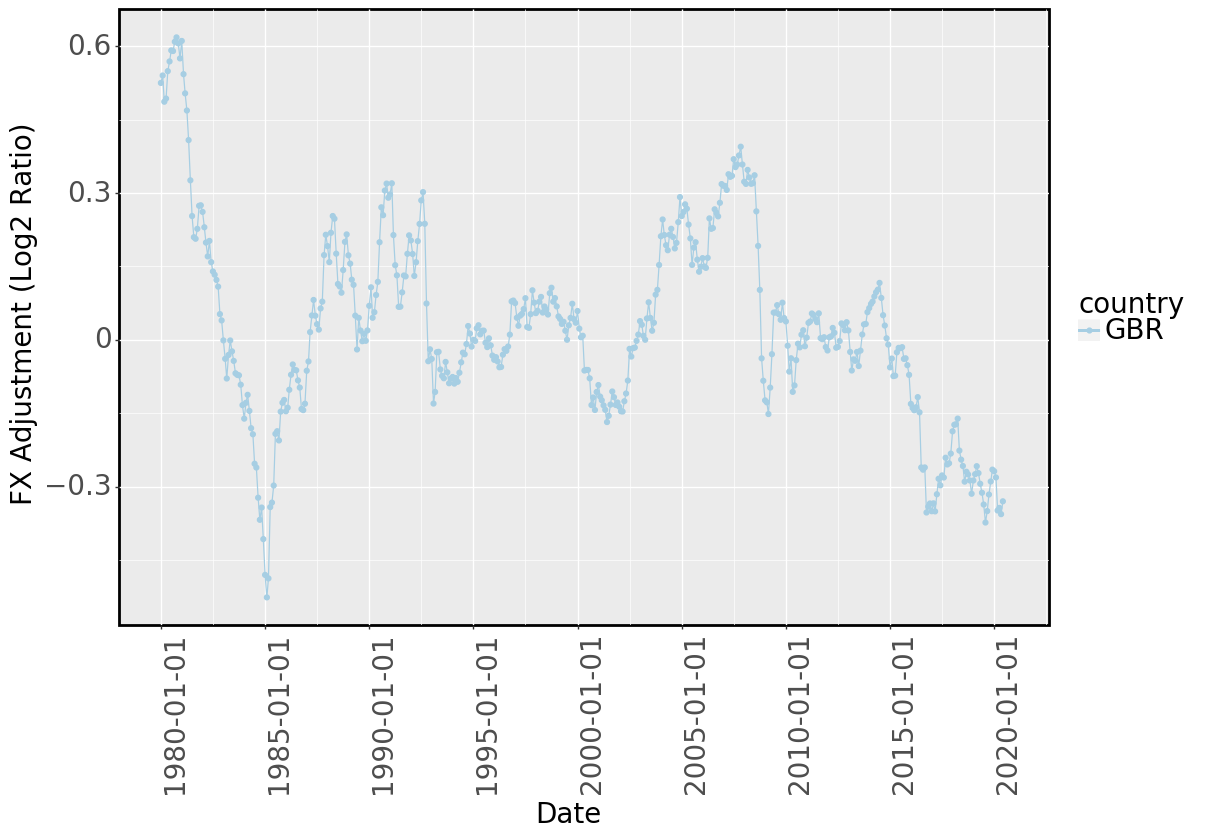

<ggplot: (-9223363260082374470)>

In [126]:
plot_tbl(fx_adjusted_diff, 'FX Adjustment (Log2 Ratio)', inject=lambda x: x.query("country == 'GBR'"))

/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 401 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/mizani/palettes.py:439: UserWarning: Warning message:Brewer palette Paired has a maximum of 12 colorsReturning the palette you asked for withthat many colors
  warnings.warn(msg)


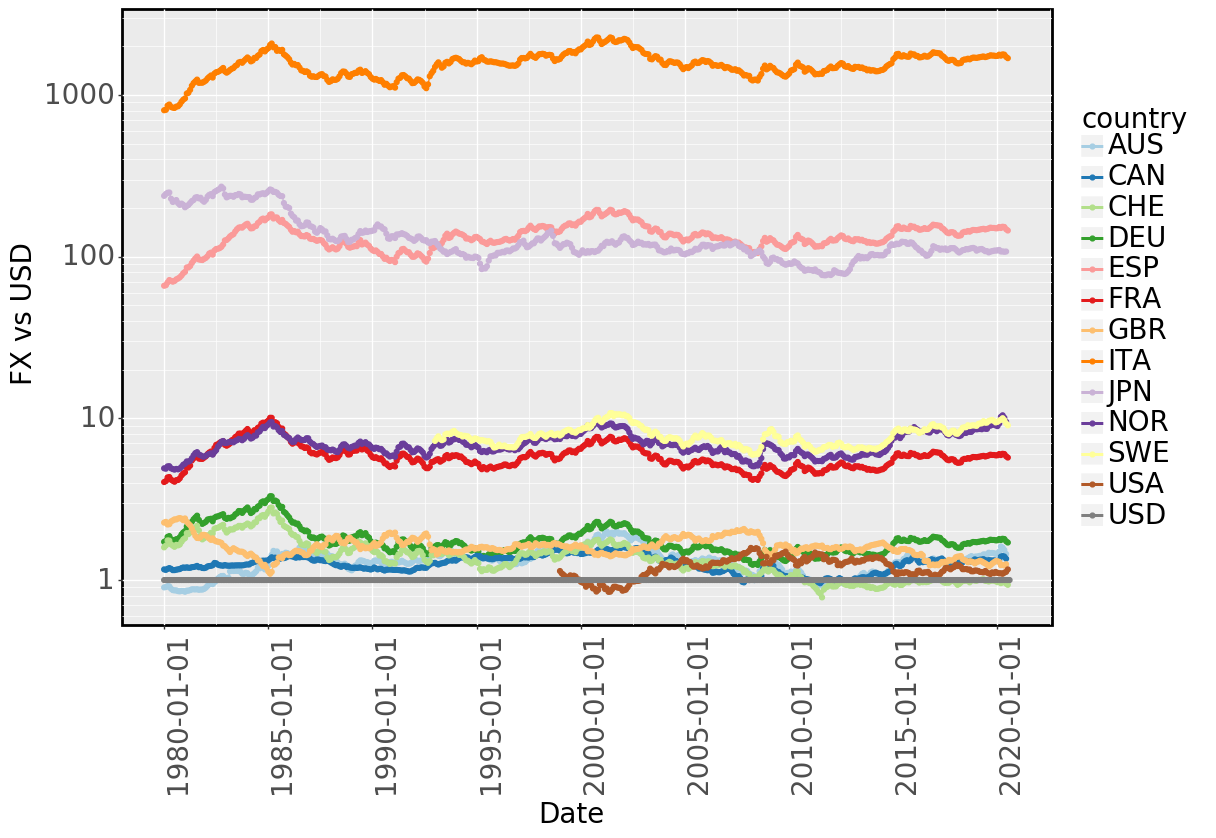

<ggplot: (-9223363260047712161)>

In [57]:
plot_tbl(usd_fx, 'FX vs USD') + scale_y_log10()

# Question 5

In [102]:

def longform(ticker):
    tbl = dlib.pull(ticker)
    tbl['date'] = tbl.index.to_series().map(lambda x: x.to_timestamp())
    tbl = tbl.melt(id_vars='date')
    tbl['ticker'] = ticker
    return tbl

money_supply = pd.concat([longform('M1-inUSD'), longform('M2-inUSD'), longform('M3-inUSD')])
money_supply

,date,country,value,ticker
0,1980-01-01,AUS,16.915,M1-inUSD
1,1980-02-01,AUS,16.865,M1-inUSD
2,1980-03-01,AUS,16.701,M1-inUSD
3,1980-04-01,AUS,17.352,M1-inUSD
4,1980-05-01,AUS,17.833,M1-inUSD
...,...,...,...,...
5363,2020-04-01,JPN,3920.576,M3-inUSD
5364,2020-05-01,JPN,3890.032,M3-inUSD
5365,2020-06-01,JPN,3942.154,M3-inUSD
5366,2020-07-01,JPN,NaN,M3-inUSD


/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 3 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2740 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


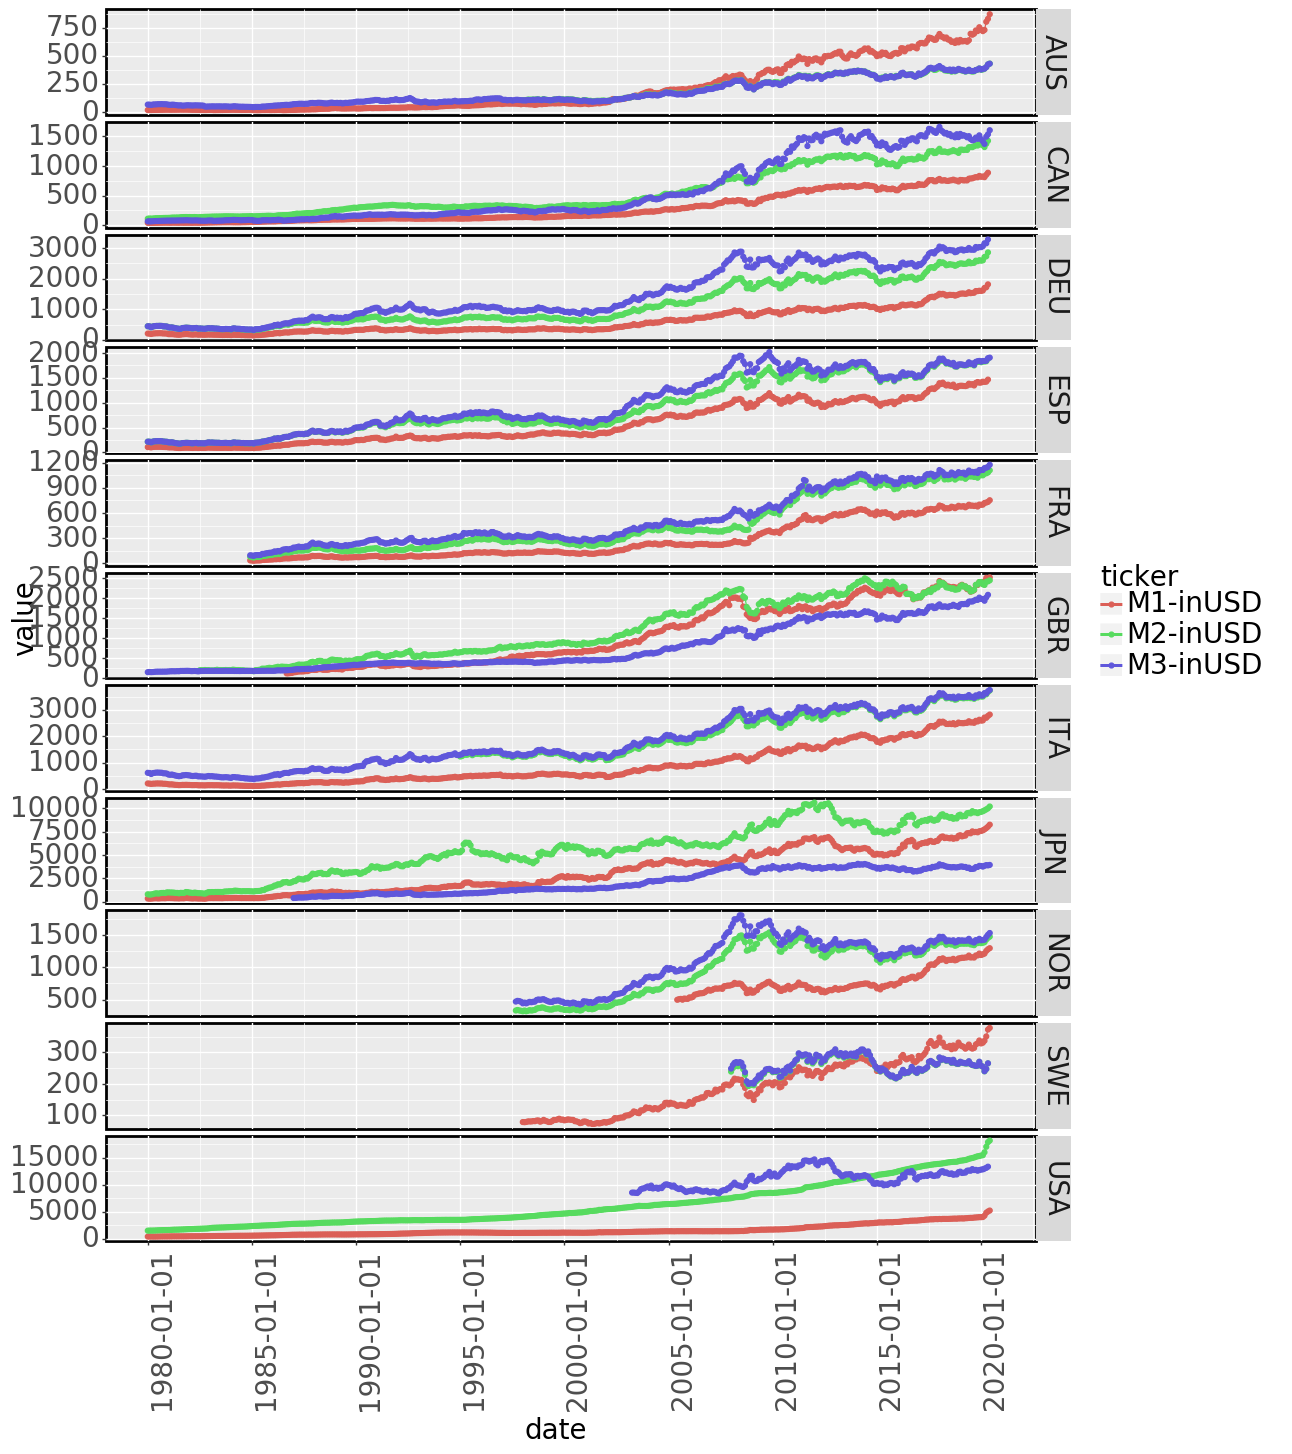

<ggplot: (8776750383508)>

In [103]:
(
    ggplot(money_supply, aes(x='date', y='value', color='ticker')) +
        geom_line() +
        geom_point() +
        facet_grid('country~.', scales='free_y') +
        scale_x_date() +
        theme(
            text=element_text(size=20),
            figure_size=(12, 16),
            legend_position='right',
            axis_text_x=element_text(size=20, angle=90, hjust=0),
            panel_border=element_rect(colour="black", size=2),
        )

)

# Question 6

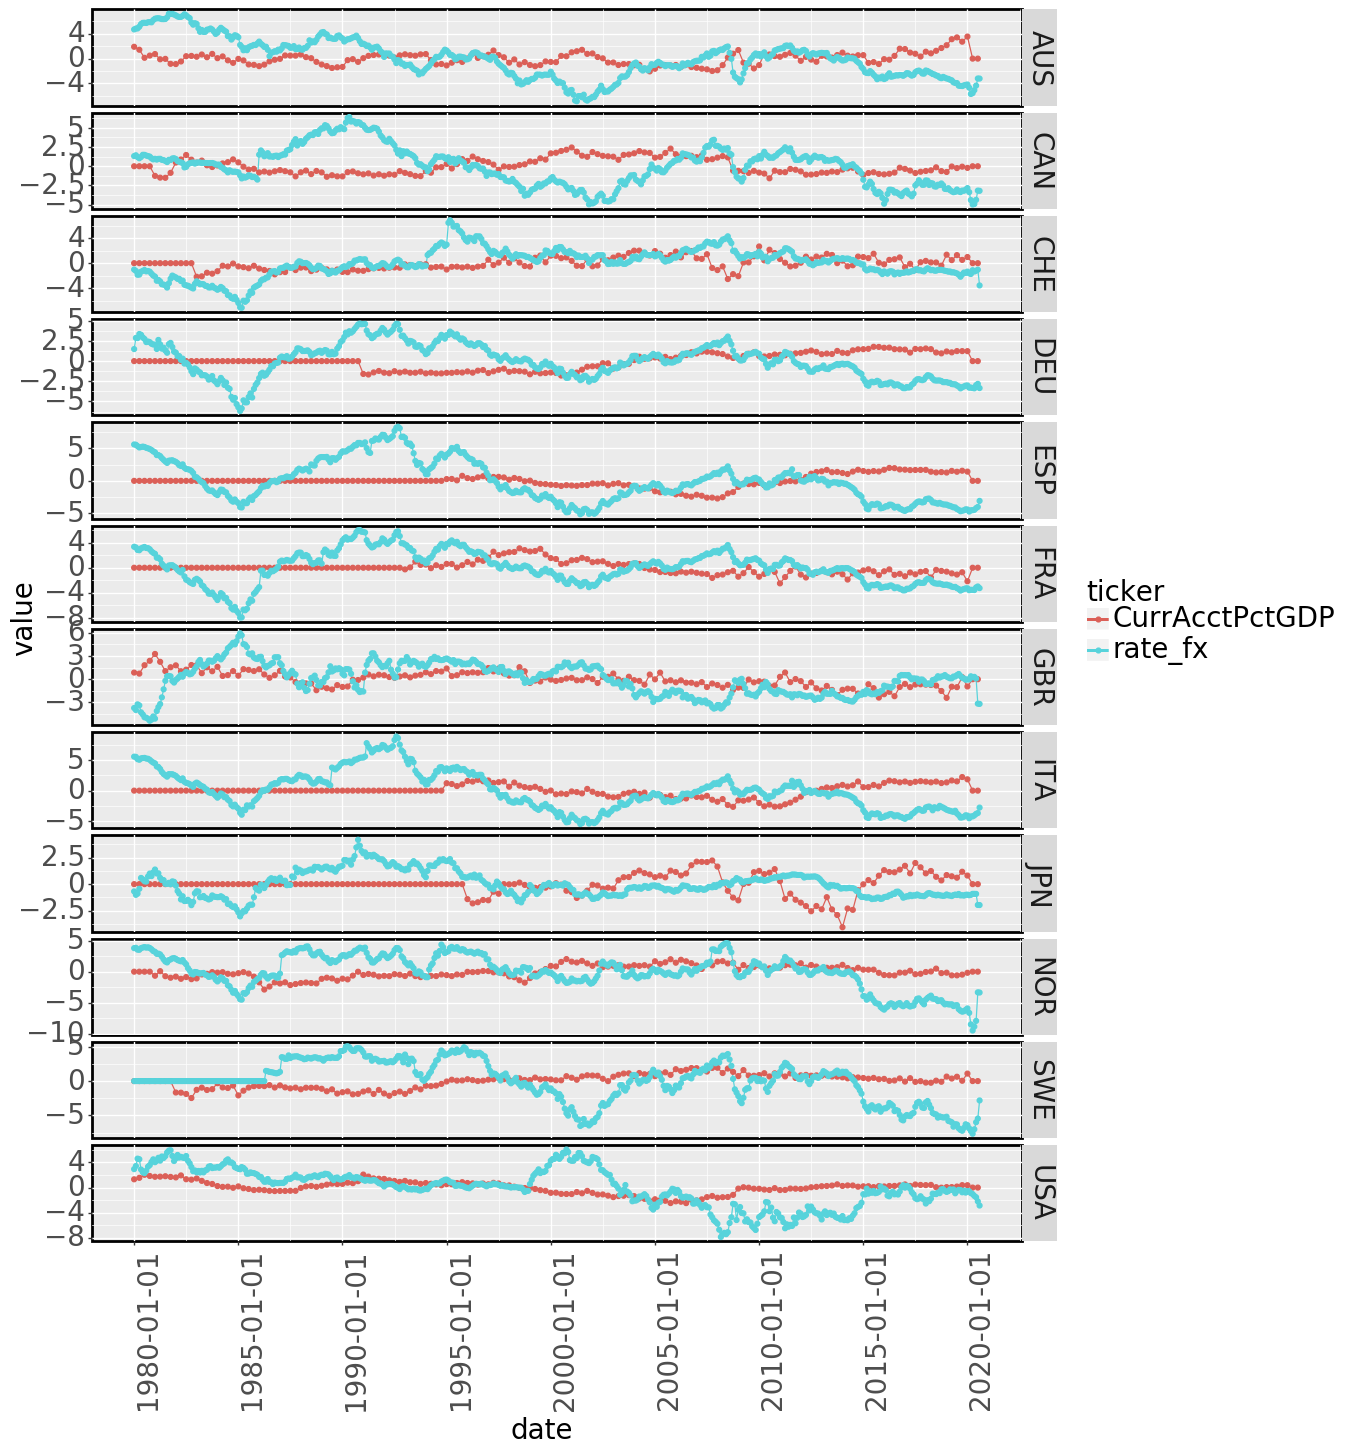

<ggplot: (-9223363260083519642)>

In [112]:
from scipy.stats import zscore

def longform(ticker, inject=lambda x: x):
    tbl = dlib.pull(ticker)
    tbl = reg_tbl(tbl, inject=inject)
    return longize_tbl(ticker, tbl, inject=inject)
    
def reg_tbl(tbl, inject=lambda x: x):
    #tbl /= tbl.abs().max()
    tbl -= tbl.mean()
    tbl = tbl.fillna(0)
    tbl = tbl.apply(zscore)
    return tbl
    
def longize_tbl(ticker, tbl, inject=lambda x: x):
    tbl['date'] = tbl.index.to_series().map(lambda x: x.to_timestamp())
    tbl = tbl.melt(id_vars='date')
    tbl['value'] = inject(tbl['value'])
    tbl['ticker'] = ticker
    return tbl

fx = reg_tbl(dlib.pull('fxVsUSD'))
sr = reg_tbl(dlib.pull('ShortRates'))
lr = reg_tbl(dlib.pull('LongRates'))
rate_fx = lr + sr - 2 * fx

fx_rates = pd.concat([longform('CurrAcctPctGDP'), longize_tbl('rate_fx', rate_fx)])

(
    ggplot(fx_rates, aes(x='date', y='value', color='ticker')) +
        geom_line() +
        geom_point() +
        facet_grid('country~.', scales='free_y') +
        scale_x_date() +
        theme(
            text=element_text(size=20),
            figure_size=(12, 16),
            legend_position='right',
            axis_text_x=element_text(size=20, angle=90, hjust=0),
            panel_border=element_rect(colour="black", size=2),
        )

)

# Question 7

/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2213 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


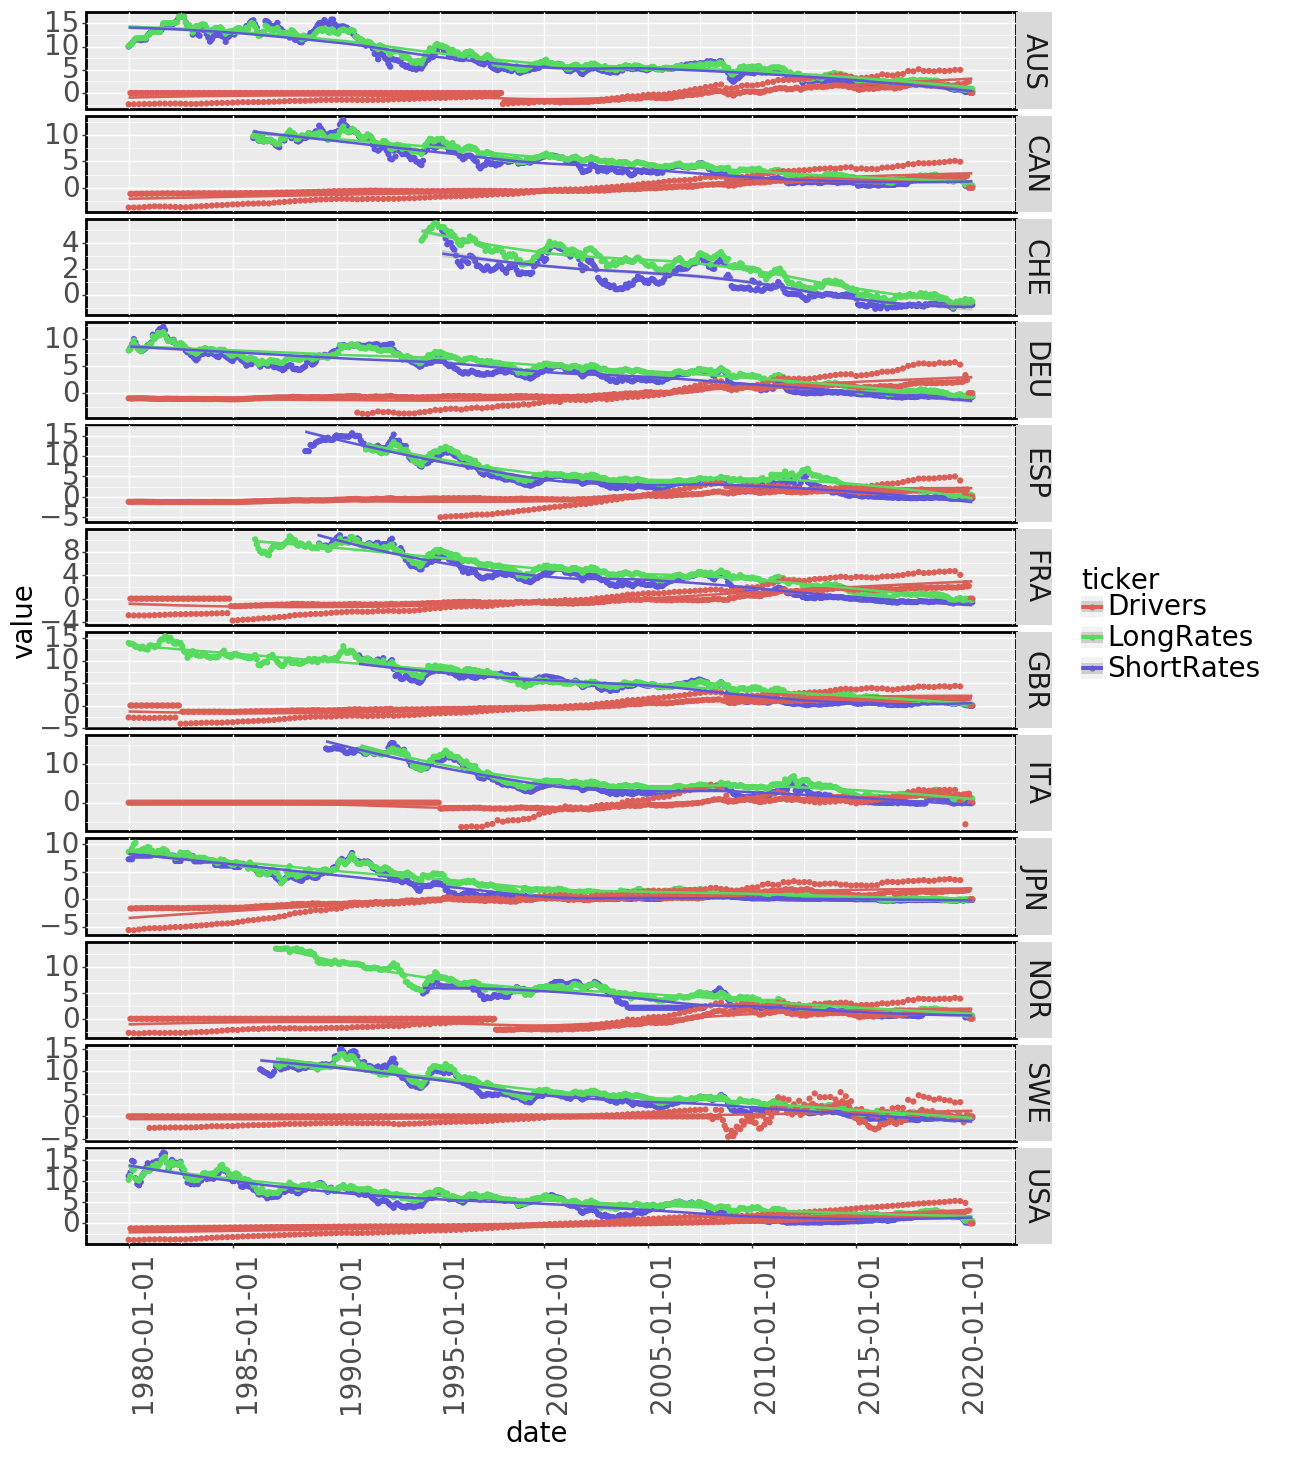

<ggplot: (8776760990654)>

In [128]:
def longform(ticker):
    tbl = dlib.pull(ticker)
    tbl['date'] = tbl.index.to_series().map(lambda x: x.to_timestamp())
    tbl = tbl.melt(id_vars='date')
    tbl['ticker'] = ticker
    return tbl



gdp = reg_tbl(dlib.pull('GDP-Real').resample('M').mean())
m2 = reg_tbl(dlib.pull('M2-inUSD').resample('M').mean())
drivers = gdp + m2



bonds_comps = pd.concat([longform('ShortRates'), longform('LongRates'), longize_tbl('Drivers', drivers)])

(
    ggplot(bonds_comps, aes(x='date', y='value', color='ticker')) +
#         geom_line() +
             geom_point() +
        geom_smooth() +
        facet_grid('country~.', scales='free_y') +
        scale_x_date() +
        theme(
            text=element_text(size=20),
            figure_size=(12, 16),
            legend_position='right',
            axis_text_x=element_text(size=20, angle=90, hjust=0),
            panel_border=element_rect(colour="black", size=2),
        )

)



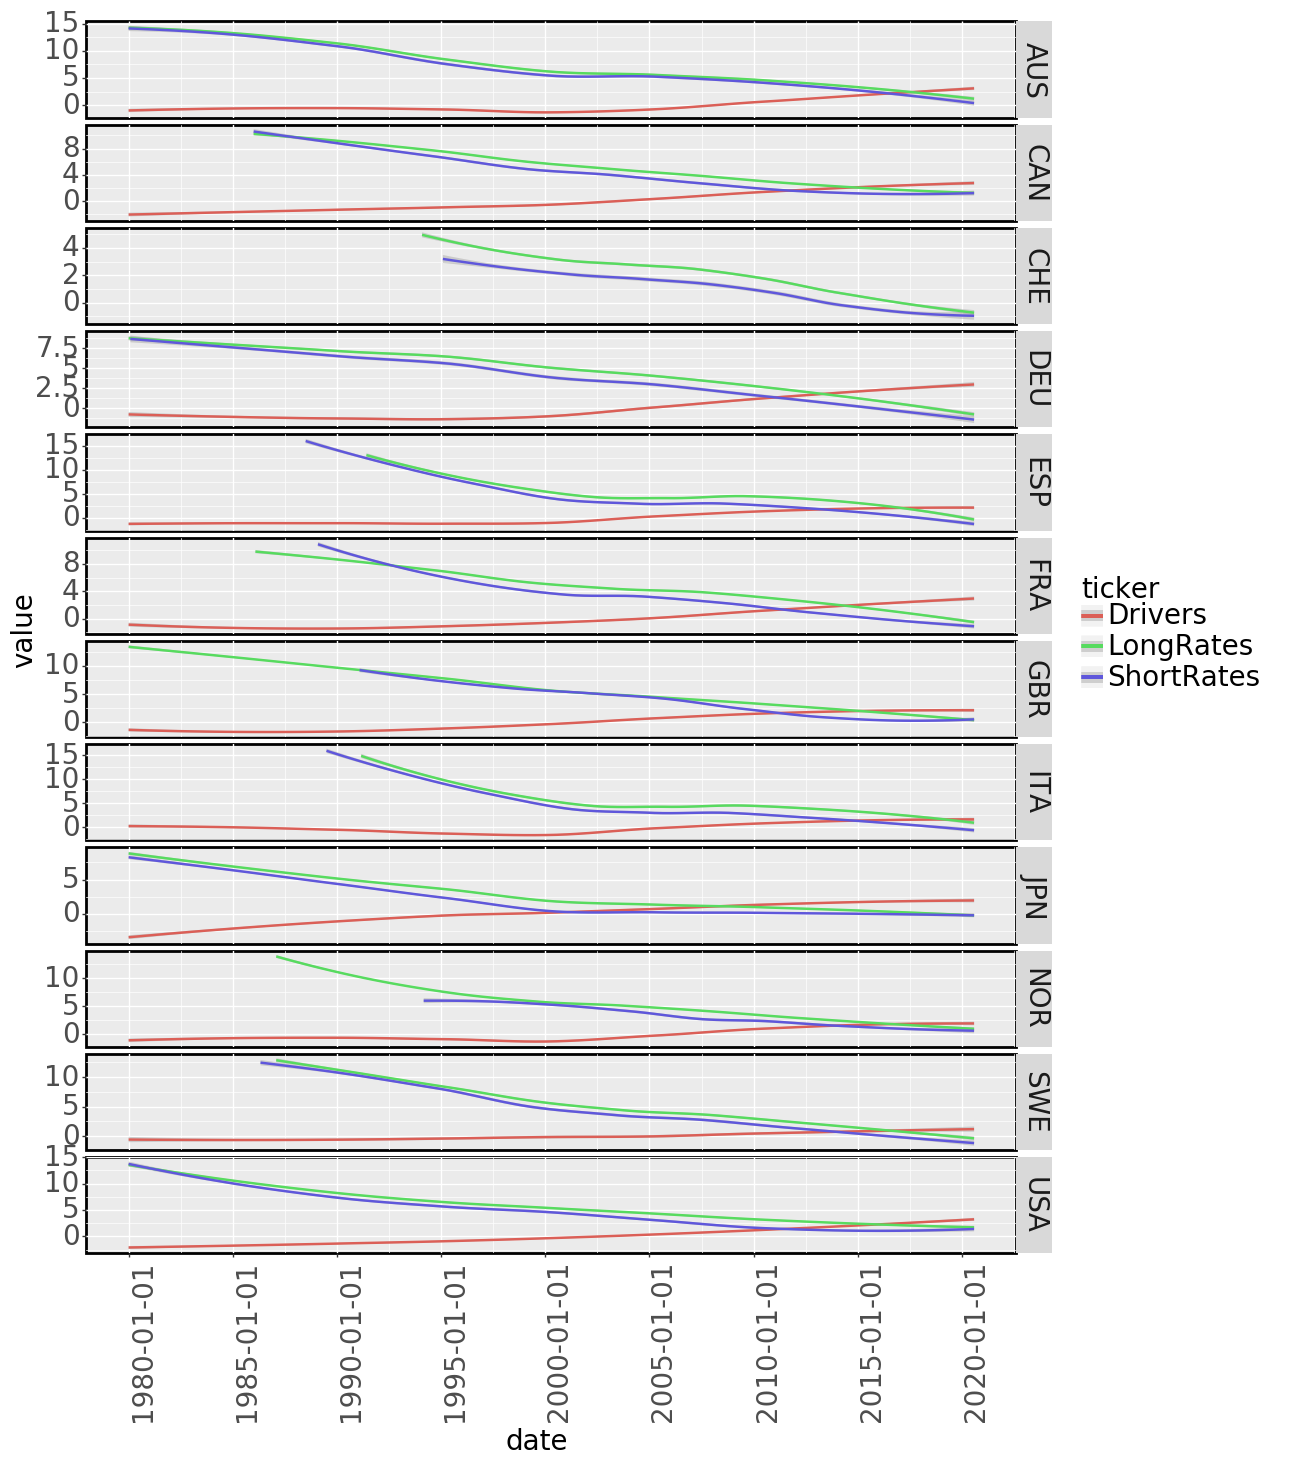

<ggplot: (8776772450238)>

In [129]:
(
    ggplot(bonds_comps, aes(x='date', y='value', color='ticker')) +
#         geom_line() +
#             geom_point() +
        geom_smooth() +
        facet_grid('country~.', scales='free_y') +
        scale_x_date() +
        theme(
            text=element_text(size=20),
            figure_size=(12, 16),
            legend_position='right',
            axis_text_x=element_text(size=20, angle=90, hjust=0),
            panel_border=element_rect(colour="black", size=2),
        )

)

